### Running a regression after merging
One of the most powerful ways to use data sets is by merging them. This notebook goes over the following things:
- preparing data for merging by cleaning it
- concatenating data sets 
- merging data based on a common column

After merging the data, we will also do a simple linear regression.

In [1]:
import pandas as pd

### Concatenation 
Concatenation is the process of combining data sets that all have the same column headers. Think of it as a way to combinging thousands of rows of data.

In [2]:
charges_01 = pd.read_csv('../data/SH Charge Receipts - 01.csv')
charges_02 = pd.read_csv('../data/SH Charge Receipts - 02.csv')
charges_03 = pd.read_csv('../data/SH Charge Receipts - 03.csv')

In [3]:
print(len(charges_01), len(charges_02), len(charges_03))

64999 64999 40024


In [4]:
charges_01.head()

,CHARGE_FILING_DATE,CP_SEX,CP_NATIONAL_ORIGIN,CP_DOB,HISPANIC_CP,CP_RACE_STRING,R_NAICS_CODE,R_NAICS_DESCRIPTION,R_NUMBER_OF_EMPLOYEES,R_TYPE
0,Oct/01/1995,Female,Other National Origin - Obsolete,Oct/21/1969,NaN,B,311612.0,Meat Processed from Carcasses,201 - 500 Employees,Private Employer
1,Oct/02/1995,Female,Other National Origin - Obsolete,Jan/01/2001,NaN,O,541990.0,"All Other Professional, Scientific, and Techni...",15 - 100 Employees,Private Employer
2,Oct/02/1995,Female,Other National Origin - Obsolete,Jul/30/1960,NaN,W,722110.0,Full-Service Restaurants,15 - 100 Employees,Private Employer
3,Oct/02/1995,Male,Other National Origin - Obsolete,Jun/02/1957,NaN,B,422990.0,Other Miscellaneous Nondurable Goods Wholesalers,15 - 100 Employees,Private Employer
4,Oct/02/1995,Female,Other National Origin - Obsolete,Apr/15/1959,NaN,W,523999.0,Miscellaneous Financial Investment Activities,501+ Employees,Private Employer


In [5]:
all_charges = pd.concat([ charges_01, charges_02, charges_03])
print(len(all_charges))

170022


In [6]:
all_charges.head()

,CHARGE_FILING_DATE,CP_SEX,CP_NATIONAL_ORIGIN,CP_DOB,HISPANIC_CP,CP_RACE_STRING,R_NAICS_CODE,R_NAICS_DESCRIPTION,R_NUMBER_OF_EMPLOYEES,R_TYPE
0,Oct/01/1995,Female,Other National Origin - Obsolete,Oct/21/1969,NaN,B,311612.0,Meat Processed from Carcasses,201 - 500 Employees,Private Employer
1,Oct/02/1995,Female,Other National Origin - Obsolete,Jan/01/2001,NaN,O,541990.0,"All Other Professional, Scientific, and Techni...",15 - 100 Employees,Private Employer
2,Oct/02/1995,Female,Other National Origin - Obsolete,Jul/30/1960,NaN,W,722110.0,Full-Service Restaurants,15 - 100 Employees,Private Employer
3,Oct/02/1995,Male,Other National Origin - Obsolete,Jun/02/1957,NaN,B,422990.0,Other Miscellaneous Nondurable Goods Wholesalers,15 - 100 Employees,Private Employer
4,Oct/02/1995,Female,Other National Origin - Obsolete,Apr/15/1959,NaN,W,523999.0,Miscellaneous Financial Investment Activities,501+ Employees,Private Employer


In [7]:
all_charges.dtypes

CHARGE_FILING_DATE        object
CP_SEX                    object
CP_NATIONAL_ORIGIN        object
CP_DOB                    object
HISPANIC_CP               object
CP_RACE_STRING            object
R_NAICS_CODE             float64
R_NAICS_DESCRIPTION       object
R_NUMBER_OF_EMPLOYEES     object
R_TYPE                    object
dtype: object

### Finding values that can facilitate merging
- load the data set you want to merge with your other data set
- modify your original data set to make sure you have a common column to merge on
- merge your data sets!

In [8]:
# Read csv of economic data
economic_data = pd.read_csv('../data/bls_sector_metrics.csv')
economic_data.head()

,naics_sector,naics_sector_rollup,naics_supersector,naics_sector_name,avg_hrly_earnings,total_employment,women_percentage,source
0,11,11,NaN,"Agriculture, Forestry, Fishing and Hunting",14.33,416.60,0.224000,"oes,cps"
1,21,21,10.0,"Mining, Quarrying, and Oil and Gas Extraction",32.95,610.20,0.151754,ces
2,22,22,40.0,Utilities,38.35,555.90,0.232776,ces
3,23,23,20.0,Construction,25.30,6687.38,0.125019,"oes,ces_supersector"
4,31,31,30.0,Manufacturing,24.39,12337.52,0.274534,"oes,ces_supersector"


In [9]:
len(economic_data)

24

In [10]:
economic_data.dtypes

naics_sector             int64
naics_sector_rollup      int64
naics_supersector      float64
naics_sector_name       object
avg_hrly_earnings      float64
total_employment       float64
women_percentage       float64
source                  object
dtype: object

In [11]:
economic_data['naics_sector'] = economic_data['naics_sector'].astype(str)

In [12]:
economic_data.dtypes

naics_sector            object
naics_sector_rollup      int64
naics_supersector      float64
naics_sector_name       object
avg_hrly_earnings      float64
total_employment       float64
women_percentage       float64
source                  object
dtype: object

In [13]:
all_charges['R_NAICS_CODE'] = all_charges['R_NAICS_CODE'].astype(str)

In [14]:
all_charges.dtypes

CHARGE_FILING_DATE       object
CP_SEX                   object
CP_NATIONAL_ORIGIN       object
CP_DOB                   object
HISPANIC_CP              object
CP_RACE_STRING           object
R_NAICS_CODE             object
R_NAICS_DESCRIPTION      object
R_NUMBER_OF_EMPLOYEES    object
R_TYPE                   object
dtype: object

In [15]:
all_charges['naics_sector'] = all_charges['R_NAICS_CODE'].apply(lambda x: x[:2])

In [16]:
all_charges.head()

,CHARGE_FILING_DATE,CP_SEX,CP_NATIONAL_ORIGIN,CP_DOB,HISPANIC_CP,CP_RACE_STRING,R_NAICS_CODE,R_NAICS_DESCRIPTION,R_NUMBER_OF_EMPLOYEES,R_TYPE,naics_sector
0,Oct/01/1995,Female,Other National Origin - Obsolete,Oct/21/1969,NaN,B,311612.0,Meat Processed from Carcasses,201 - 500 Employees,Private Employer,31
1,Oct/02/1995,Female,Other National Origin - Obsolete,Jan/01/2001,NaN,O,541990.0,"All Other Professional, Scientific, and Techni...",15 - 100 Employees,Private Employer,54
2,Oct/02/1995,Female,Other National Origin - Obsolete,Jul/30/1960,NaN,W,722110.0,Full-Service Restaurants,15 - 100 Employees,Private Employer,72
3,Oct/02/1995,Male,Other National Origin - Obsolete,Jun/02/1957,NaN,B,422990.0,Other Miscellaneous Nondurable Goods Wholesalers,15 - 100 Employees,Private Employer,42
4,Oct/02/1995,Female,Other National Origin - Obsolete,Apr/15/1959,NaN,W,523999.0,Miscellaneous Financial Investment Activities,501+ Employees,Private Employer,52


In [17]:
all_charges_economic_data = pd.merge(
    all_charges,
    economic_data,
    on='naics_sector',
    how = 'inner'

)

In [18]:
all_charges_economic_data.head()

,CHARGE_FILING_DATE,CP_SEX,CP_NATIONAL_ORIGIN,CP_DOB,HISPANIC_CP,CP_RACE_STRING,R_NAICS_CODE,R_NAICS_DESCRIPTION,R_NUMBER_OF_EMPLOYEES,R_TYPE,naics_sector,naics_sector_rollup,naics_supersector,naics_sector_name,avg_hrly_earnings,total_employment,women_percentage,source
0,Oct/01/1995,Female,Other National Origin - Obsolete,Oct/21/1969,NaN,B,311612.0,Meat Processed from Carcasses,201 - 500 Employees,Private Employer,31,31,30.0,Manufacturing,24.39,12337.52,0.274534,"oes,ces_supersector"
1,Oct/02/1995,Female,Other National Origin - Obsolete,Dec/20/1946,NaN,W,314999.0,All Other Miscellaneous Textile Product Mills,15 - 100 Employees,Private Employer,31,31,30.0,Manufacturing,24.39,12337.52,0.274534,"oes,ces_supersector"
2,Oct/06/1995,Female,Other National Origin - Obsolete,Aug/31/1974,NaN,B,311612.0,Meat Processed from Carcasses,501+ Employees,Private Employer,31,31,30.0,Manufacturing,24.39,12337.52,0.274534,"oes,ces_supersector"
3,Oct/11/1995,Female,Hispanic - Obsolete,Aug/08/1963,NaN,W,311999.0,All Other Miscellaneous Food Manufacturing,15 - 100 Employees,Private Employer,31,31,30.0,Manufacturing,24.39,12337.52,0.274534,"oes,ces_supersector"
4,Oct/16/1995,Female,Other National Origin - Obsolete,Jan/01/1901,NaN,O,316219.0,Other Footwear Manufacturing,501+ Employees,Private Employer,31,31,30.0,Manufacturing,24.39,12337.52,0.274534,"oes,ces_supersector"


#### Regression analysis 

In a linear regression we try to predict how one variable (the dependent variable) changes depending on another variable (independent variable). In this data analysis we're looking at the number of sexual harassment claims and will ask things like: how does the 

In the next cells we will:
- plot our datapoints
- run a regression
First let's install libraries that we need:

In [19]:
!pip3 install scikit-learn statsmodels numpy matplotlib

In [20]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [21]:
all_charges_economic_data.head()

,CHARGE_FILING_DATE,CP_SEX,CP_NATIONAL_ORIGIN,CP_DOB,HISPANIC_CP,CP_RACE_STRING,R_NAICS_CODE,R_NAICS_DESCRIPTION,R_NUMBER_OF_EMPLOYEES,R_TYPE,naics_sector,naics_sector_rollup,naics_supersector,naics_sector_name,avg_hrly_earnings,total_employment,women_percentage,source
0,Oct/01/1995,Female,Other National Origin - Obsolete,Oct/21/1969,NaN,B,311612.0,Meat Processed from Carcasses,201 - 500 Employees,Private Employer,31,31,30.0,Manufacturing,24.39,12337.52,0.274534,"oes,ces_supersector"
1,Oct/02/1995,Female,Other National Origin - Obsolete,Dec/20/1946,NaN,W,314999.0,All Other Miscellaneous Textile Product Mills,15 - 100 Employees,Private Employer,31,31,30.0,Manufacturing,24.39,12337.52,0.274534,"oes,ces_supersector"
2,Oct/06/1995,Female,Other National Origin - Obsolete,Aug/31/1974,NaN,B,311612.0,Meat Processed from Carcasses,501+ Employees,Private Employer,31,31,30.0,Manufacturing,24.39,12337.52,0.274534,"oes,ces_supersector"
3,Oct/11/1995,Female,Hispanic - Obsolete,Aug/08/1963,NaN,W,311999.0,All Other Miscellaneous Food Manufacturing,15 - 100 Employees,Private Employer,31,31,30.0,Manufacturing,24.39,12337.52,0.274534,"oes,ces_supersector"
4,Oct/16/1995,Female,Other National Origin - Obsolete,Jan/01/1901,NaN,O,316219.0,Other Footwear Manufacturing,501+ Employees,Private Employer,31,31,30.0,Manufacturing,24.39,12337.52,0.274534,"oes,ces_supersector"


In [22]:
all_charges_economic_data.columns

Index(['CHARGE_FILING_DATE', 'CP_SEX', 'CP_NATIONAL_ORIGIN', 'CP_DOB',
       'HISPANIC_CP', 'CP_RACE_STRING', 'R_NAICS_CODE', 'R_NAICS_DESCRIPTION',
       'R_NUMBER_OF_EMPLOYEES', 'R_TYPE', 'naics_sector',
       'naics_sector_rollup', 'naics_supersector', 'naics_sector_name',
       'avg_hrly_earnings', 'total_employment', 'women_percentage', 'source'],
      dtype='object')

### Preparing the data for a linear regression

In [23]:
super_sectors = all_charges_economic_data.groupby(["naics_sector_name", "avg_hrly_earnings" , "women_percentage", "total_employment"]).agg({
    "CHARGE_FILING_DATE":"count"
}).reset_index(
    
).rename(
    columns={"CHARGE_FILING_DATE":"num_claims"}
)


super_sectors

,naics_sector_name,avg_hrly_earnings,women_percentage,total_employment,num_claims
0,Accommodation and Food Services,14.10,0.527273,13449.20,14208
1,Administrative and Support and Waste Managemen...,19.57,0.425634,9076.10,6288
2,"Agriculture, Forestry, Fishing and Hunting",14.33,0.224000,416.60,950
3,"Arts, Entertainment, and Recreation",20.91,0.471412,2235.20,1538
4,Construction,25.30,0.125019,6687.38,3070
5,Educational Services,26.03,0.613699,3587.10,3977
6,Finance and Insurance,33.50,0.568236,6167.00,4707
7,Health Care and Social Assistance,26.11,0.800281,19157.90,10090
8,Information,34.86,0.400215,2762.09,3949
9,Management of Companies and Enterprises,38.41,0.482840,2246.50,309


Let's normalize the data 

In [24]:
super_sectors["num_claims_per_10000"] =(super_sectors["num_claims"]/super_sectors["total_employment"])*10
super_sectors

,naics_sector_name,avg_hrly_earnings,women_percentage,total_employment,num_claims,num_claims_per_10000
0,Accommodation and Food Services,14.10,0.527273,13449.20,14208,10.564197
1,Administrative and Support and Waste Managemen...,19.57,0.425634,9076.10,6288,6.928086
2,"Agriculture, Forestry, Fishing and Hunting",14.33,0.224000,416.60,950,22.803649
3,"Arts, Entertainment, and Recreation",20.91,0.471412,2235.20,1538,6.880816
4,Construction,25.30,0.125019,6687.38,3070,4.590737
5,Educational Services,26.03,0.613699,3587.10,3977,11.086950
6,Finance and Insurance,33.50,0.568236,6167.00,4707,7.632560
7,Health Care and Social Assistance,26.11,0.800281,19157.90,10090,5.266757
8,Information,34.86,0.400215,2762.09,3949,14.297145
9,Management of Companies and Enterprises,38.41,0.482840,2246.50,309,1.375473


Now let's plot the data 

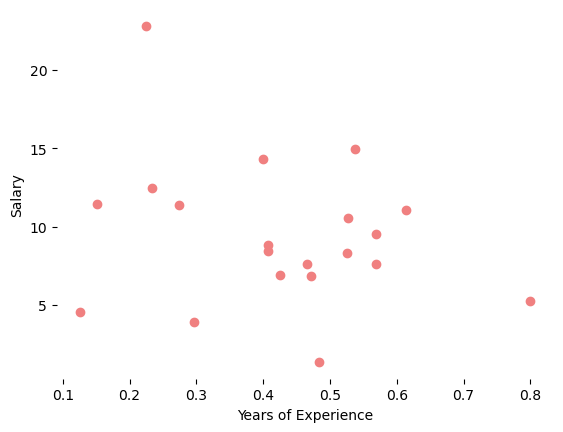

In [25]:
# Relationship between Salary and Experience
plt.scatter(super_sectors["women_percentage"],super_sectors['num_claims_per_10000'], color = 'lightcoral')
plt.title('')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.box(False)
plt.show()

#### Preparing the data for the regression analysis
Here we will split our data into Independent/Dependent variables: number of claims per 10,000 people (X) is the independent variable. The percentage of women in that sector (y) is dependent on experience.


In [27]:
# Prepare the data for regression
X = sm.add_constant(super_sectors['women_percentage'])  # Add a constant term to the independent variable
y = super_sectors['num_claims_per_10000']


#### Running a simple regression

Below wer're now using the statsmodel library to run a regression on these numbers

In [28]:
# Fit the model
model = sm.OLS(y, X).fit()

# Print the summary
print(model.summary())

print("\nStatsmodels results:")
# Print the summary
print(model.summary())


                             OLS Regression Results                             
Dep. Variable:     num_claims_per_10000   R-squared:                       0.057
Model:                              OLS   Adj. R-squared:                  0.005
Method:                   Least Squares   F-statistic:                     1.098
Date:                  Thu, 11 Jul 2024   Prob (F-statistic):              0.309
Time:                          16:45:55   Log-Likelihood:                -58.049
No. Observations:                    20   AIC:                             120.1
Df Residuals:                        18   BIC:                             122.1
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               

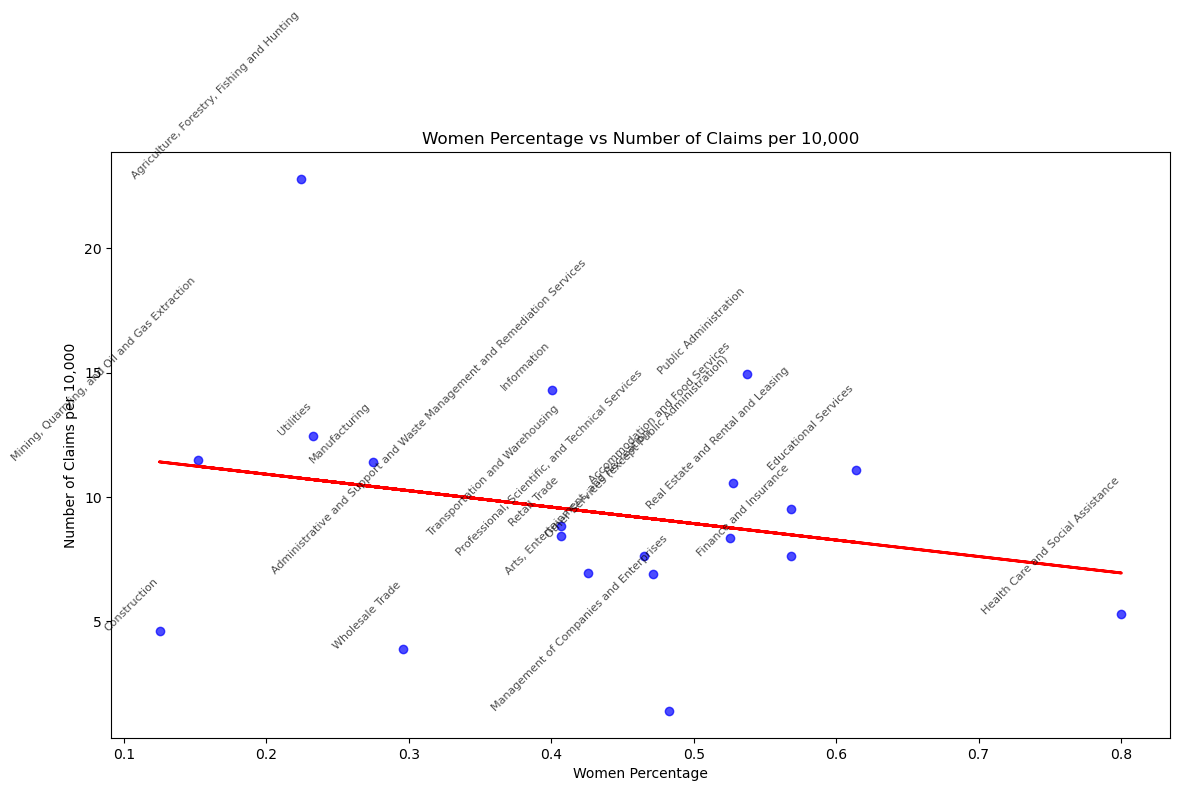

In [35]:

# Create a scatter plot with the regression line
plt.figure(figsize=(12, 8))
plt.scatter(super_sectors['women_percentage'], super_sectors['num_claims_per_10000'], color='blue', alpha=0.7)
plt.plot(super_sectors['women_percentage'], model.predict(X), color='red', linewidth=2)

plt.xlabel('Women Percentage')
plt.ylabel('Number of Claims per 10,000')
plt.title('Women Percentage vs Number of Claims per 10,000')

# Add labels for each point
for i, txt in enumerate(super_sectors['naics_sector_name']):
    plt.annotate(txt, (super_sectors['women_percentage'][i], super_sectors['num_claims_per_10000'][i]), 
                 fontsize=8, alpha=0.7, rotation=45, ha='right')

plt.tight_layout()
plt.show()


In [36]:
# Print R-squared and coefficients
print(f"\nR-squared: {model.rsquared:.4f}")
print("\nCoefficients:")
print(f"Intercept: {model.params[0]:.4f}")
print(f"Women Percentage: {model.params[1]:.4f}")


R-squared: 0.0575

Coefficients:
Intercept: 12.2331
Women Percentage: -6.6228
